# Cross-Country Comparison between Benin, Sierra Leone and Togo

Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import kruskal

In [2]:
benin = pd.read_csv('/Users/elbethelzewdie/Documents/solar-challenge-week0/solar-challenge-week0/data/benin_clean.csv')
sierra = pd.read_csv('/Users/elbethelzewdie/Documents/solar-challenge-week0/solar-challenge-week0/data/sierra-leone_clean.csv')
togo = pd.read_csv('/Users/elbethelzewdie/Documents/solar-challenge-week0/solar-challenge-week0/data/togo_clean.csv')

# Add country column for identification
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all
df_all = pd.concat([benin, sierra, togo], ignore_index=True)
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


/var/folders/7h/pt6smvdj6k993z68shptnrdc0000gn/T/ipykernel_20845/2532779347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=col, data=df_all, palette='Set2')
/var/folders/7h/pt6smvdj6k993z68shptnrdc0000gn/T/ipykernel_20845/2532779347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=col, data=df_all, palette='Set2')
/var/folders/7h/pt6smvdj6k993z68shptnrdc0000gn/T/ipykernel_20845/2532779347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=col, data=df_all, palette='Set2')


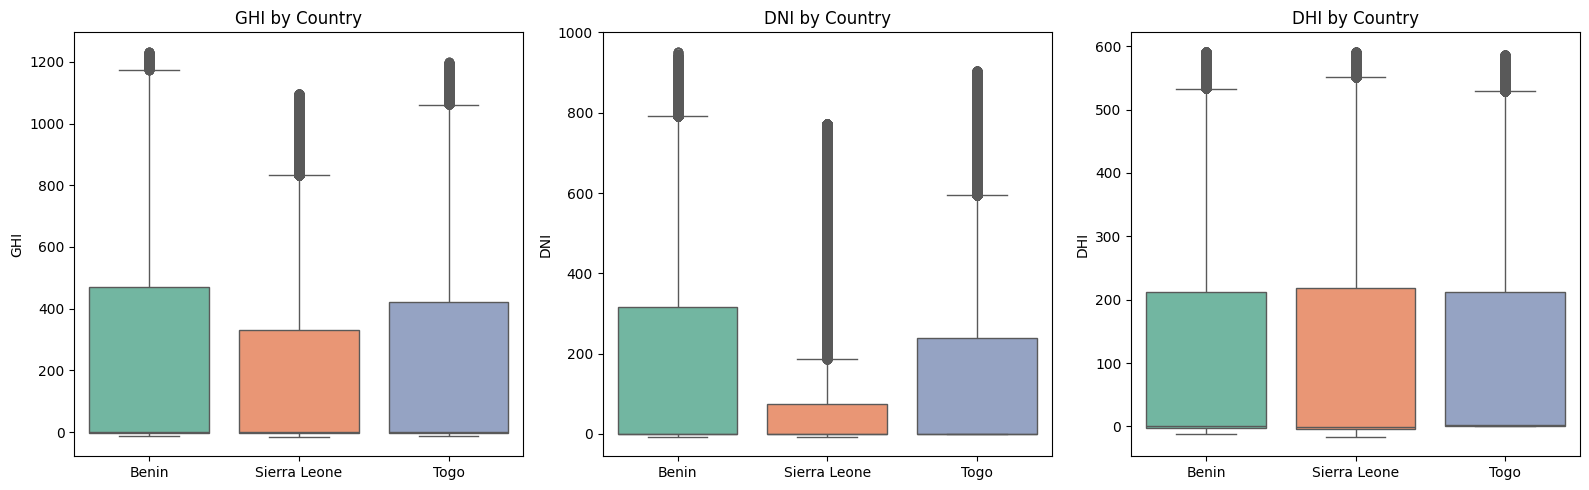

In [3]:
plt.figure(figsize=(16,5))

for i, col in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Country', y=col, data=df_all, palette='Set2')
    plt.title(f'{col} by Country')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [4]:
summary = (
    df_all.groupby('Country')[['GHI', 'DNI', 'DHI']]
    .agg(['mean', 'median', 'std'])
    .round(2)
)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

In [4]:
f_stat, p_val = f_oneway(
    df_all[df_all['Country'] == 'Benin']['GHI'],
    df_all[df_all['Country'] == 'Sierra Leone']['GHI'],
    df_all[df_all['Country'] == 'Togo']['GHI']
)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

ANOVA F-statistic: 3833.184, p-value: 0.00000


In [6]:
stat, p_val = kruskal(
    df_all[df_all['Country'] == 'Benin']['GHI'],
    df_all[df_all['Country'] == 'Sierra Leone']['GHI'],
    df_all[df_all['Country'] == 'Togo']['GHI']
)

print(f"Kruskal–Wallis statistic: {stat:.3f}, p-value: {p_val:.5f}")

Kruskal–Wallis statistic: 6548.534, p-value: 0.00000


### 🌞 Key Observations
- Benin shows the **highest median GHI**, indicating strong solar potential.
- Sierra Leone exhibits **greater variability** in GHI, likely due to coastal weather patterns.
- Togo has **moderate solar radiation** but consistent DNI, suggesting stable direct sunlight.


/var/folders/7h/pt6smvdj6k993z68shptnrdc0000gn/T/ipykernel_20845/981002516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='coolwarm')


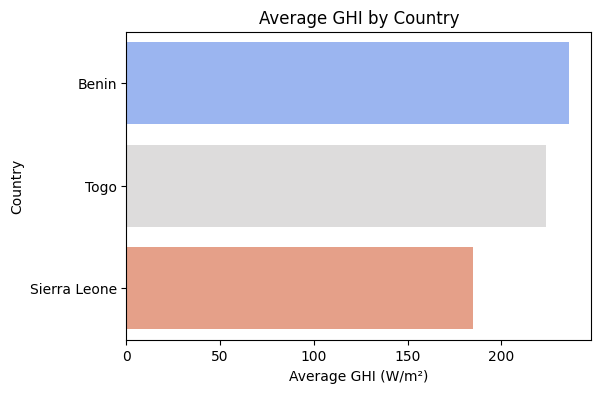

In [5]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='coolwarm')
plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.ylabel('Country')
plt.show()
